In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
dataset = pd.read_csv('/content/sample_data/pulsar_stars.csv')
dataset

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0
...,...,...,...,...,...,...,...,...,...
10732,117.562500,56.254271,0.142497,-0.516391,1.901338,13.155818,10.831868,152.814190,0.0
10733,118.031250,49.032823,0.301118,-0.075078,7.844482,33.007360,4.413993,19.364101,0.0
10734,111.640625,50.119815,0.157152,-0.414022,4.302676,21.976204,6.179571,42.768495,0.0
10735,138.578125,49.927230,0.186384,-0.263425,2.233278,18.380726,9.188299,91.154473,0.0


In [2]:
dataset=dataset.dropna()
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

In [3]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0.0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0.0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0.0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0.0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0.0


In [4]:
x = dataset.iloc[:, [2,4]]
y = dataset.iloc[:, -1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x_train, x_test, y_train, y_test

(       Excess kurtosis of the integrated profile   Mean of the DM-SNR curve
 1774                                    0.802787                   2.741639
 6433                                    0.610427                   2.163043
 4168                                    0.471212                   3.255017
 2571                                   -0.088437                   7.358696
 9604                                    0.131704                   1.825251
 ...                                          ...                        ...
 9225                                    1.960779                   3.966555
 4859                                    0.143348                   1.336120
 3264                                    1.431002                   4.910535
 9845                                   -0.094423                   1.370401
 2732                                    0.421144                   3.122910
 
 [8052 rows x 2 columns],
        Excess kurtosis of the integrated profil

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [6]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', degree=8)
svclassifier.fit(x_train,y_train)
svclassifier

SVC(degree=8)

In [7]:
y_pred = svclassifier.predict(x_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[2366,   15],
       [  59,  244]])

<ipython-input-9-ed755f12609f>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


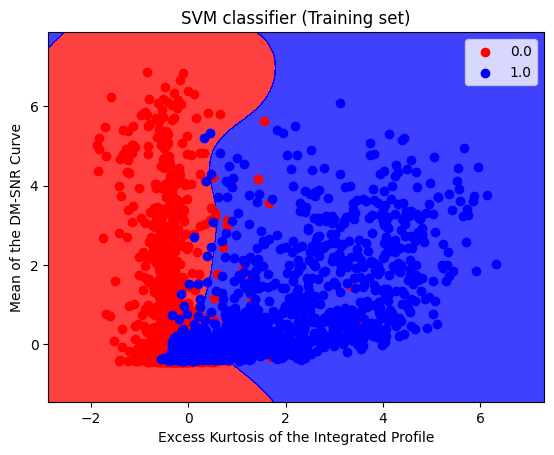

In [9]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'svclassifier' is your trained SVM classifier

# Plot decision boundaries
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svclassifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)

# Set plot labels and legend
plt.title('SVM classifier (Training set)')
plt.xlabel('Excess Kurtosis of the Integrated Profile')
plt.ylabel('Mean of the DM-SNR Curve')
plt.legend()

# Show the plot
plt.show()

<ipython-input-10-39b46bdf53bb>:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


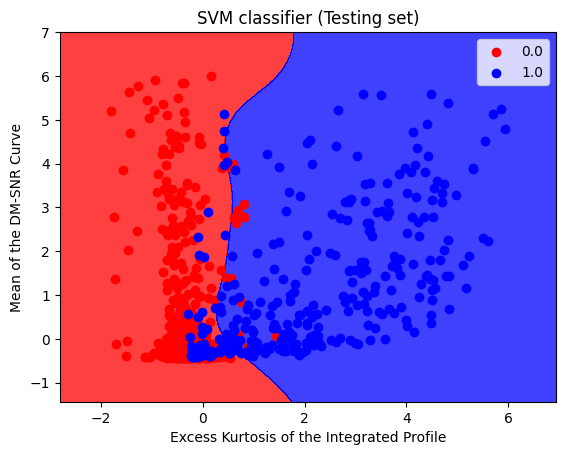

In [10]:
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'svclassifier' is your trained SVM classifier

# Plot decision boundaries
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, svclassifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)

# Set plot labels and legend
plt.title('SVM classifier (Testing set)')
plt.xlabel('Excess Kurtosis of the Integrated Profile')
plt.ylabel('Mean of the DM-SNR Curve')
plt.legend()

# Show the plot
plt.show()